In [1]:
m = 2**32
a = 1664525
c = 1013904223
x_prev = 7


# Конгруэнтный метод (генерирует значение от 0 до 1)
def generator():
    global x_prev
    x_prev = (a*x_prev + c) % m
    
    return x_prev / m

In [2]:
from sympy import Symbol, integrate, solve, symbols, exp, collect, Eq
from pynverse import inversefunc
import numpy as np


# Task 1
psi = Symbol('psi', real=True)
x = Symbol('x', real=True)
l, k, sigma = symbols('l k sigma', real=True)
n = 10**6


def inverse_function_method(function, list_with_param):
    basic_random_value = generator()    
    integral_result=integrate(function, (x, 0, psi))
    
    for i in list_with_param:
      integral_result = integral_result.subs(i[0], i[1])
     
    eq = Eq(integral_result, basic_random_value)

    return solve(eq, psi)[0]
    

function_eval = inverse_function_method(l*exp(-l*x), [(l, 0.5)])
print(function_eval)

funct = lambda i: 1.5 * np.exp(-1.5*i) if i>=0 else 0.00
inv_function = inversefunc(funct)

0.545667945752704


In [3]:
import random
from scipy.stats import expon, norm


list_of_points = []
n=10000


points = np.array([generator() for x in range(n)])
inv_norm_cdf = inversefunc(norm.cdf)
list_of_points = np.array([inv_norm_cdf(i) for i in points])

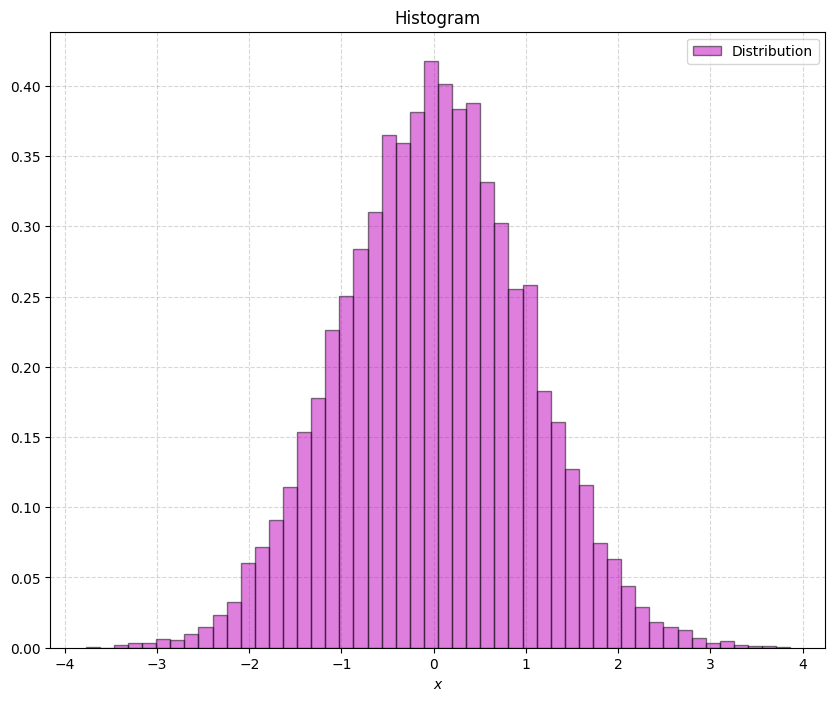

In [4]:
import matplotlib.pyplot as plt
import numpy as np


def create_histogram(list_of_points):
    if len(list_of_points) == 0:
        generate_array_of_points()
        
    list_of_points = np.array(list_of_points, dtype=float)
    
    plt.figure(figsize=(10, 8))
    plt.hist(list_of_points, bins=50, color='m', density=True, edgecolor='k', label='Distribution', alpha=0.5, zorder=2)
    plt.xlabel(r'$x$')
    plt.legend()
    plt.grid(which='both', linestyle='--', alpha=0.5)
    plt.title("Histogram")
    plt.show()


create_histogram(list_of_points)

Точечная оценка матожидания и дисперсии
$${\hat{\mu}} = \frac{1}{n}\sum_{i=1}^{n}{X_i}$$
$${\hat{\sigma}}=\frac{1}{n-1}\sum_{i=1}^{n}{(X_i - \hat{\mu})^2}$$

Интервальная оценка матожидания
$$Z=\frac{(\hat{X} - \hat{\mu}) \sqrt{n}}{\hat{\sigma}} \sim St(n-1)$$
$$\gamma = \frac{1 + \alpha}{2}$$
$$t_{\gamma} = St_{\gamma}(n-1)$$
$$I_{\beta} = [\hat{X} - \frac{\hat{\sigma}}{\sqrt{n}}t_{\gamma}, \hat{X} + \frac{\hat{\sigma}}{\sqrt{n}}t_{\gamma}]$$

Интервальная оценка дисперсии
$$\frac{(n-1)\hat{\sigma}^2}{\sigma^2} \sim \chi^2_{n-1}$$
$$c_1 = \chi_{n-1, \frac{\alpha}{2}}$$
$$c_2 = \chi_{n-1, 1-\frac{\alpha}{2}}$$
$$I_{\beta} = [\frac{(n-1)\hat{\sigma}^2}{c_2}, \frac{(n-1)\hat{\sigma}^2}{c_1}]$$

In [5]:
from scipy import stats


N = len(list_of_points)
points = np.array(list_of_points)
mu = points.mean()
sigma = ((points - mu) ** 2).sum() / (N - 1)

beta = 0.95
gamma = (1 + beta) / 2
t_gamma = stats.t.ppf(gamma, N-1)

low_mu = mu - sigma / np.sqrt(N) * t_gamma
upper_mu = mu + sigma / np.sqrt(N) * t_gamma

chi_stat = (N - 1) * sigma ** 2
c1 = stats.chi2.ppf((1 - beta) / 2, N - 1)
c2 = stats.chi2.ppf((1 + beta) / 2, N - 1)

low_sigma = chi_stat / c2
upper_sigma = chi_stat / c1

In [6]:
print("Точечная оценка матожидания: ", mu)
print("Точечная оценка дисперсии: ", sigma)

print(f"{beta}% интервальная оценка матожидания: [{low_mu}, {upper_mu}]")
print(f"{beta}% интервальная оценка дисперсии: [{low_sigma}, {upper_sigma}]")

Точечная оценка матожидания:  0.011448075597167174
Точечная оценка дисперсии:  0.9972967563123779
0.95% интервальная оценка матожидания: [-0.008100948022122868, 0.030997099216457213]
0.95% интервальная оценка дисперсии: [0.9675967216769572, 1.0227568343392281]


In [7]:
print(np.array(list_of_points))

[1.36258458 0.28581911 1.45367266 ... 0.25002301 0.49627785 0.00242929]


In [8]:
ecdf = stats.ecdf(list_of_points)
kolmogorov_stat = max(abs(ecdf.cdf.evaluate(x) - norm.cdf(x)) for x in np.linspace(0, 1, N)) * np.sqrt(N)
print(kolmogorov_stat)
p_value = 1 - stats.kstwobign.cdf(kolmogorov_stat)

print("p_value: ", p_value)

0.5790791122131433
p_value:  0.8907133053288602


In [9]:
# Task 2 (29 Распределение Паскаля)
import numpy as np
import math
import random


delta = 0.001
r = 40
p = 0.6


def calculate_C_n_k(n, k):
    return (math.factorial(n)/math.factorial(k))/math.factorial(n-k)


def f_x(i):
    return calculate_C_n_k(i+r-1,i)*(p**r)*(1-p)**i


def generate_range():
    list_with_ranges = [0]
    i = 0
    while list_with_ranges[i] + delta < 1:
        list_with_ranges.append( f_x(i) + list_with_ranges[-1])
        i += 1
        
    list_with_ranges.append(1)    
    list_with_ranges = list_with_ranges[1:]

    return list_with_ranges


def generate_descreete_value():
    num = generator()
    i = 0
    while num > list_with_ranges[i]:
        i += 1
        
    return i


def real_cdf(num):
    cum_sum = [0]
    for p in list_with_ranges:
        cum_sum.append(cum_sum[-1] + p)
        
    cum_sum = cum_sum[1:] 
    
    result_idx = len(list_with_ranges) - 1
    for idx, p in enumerate(cum_sum):
 
        if num < idx:
            result_idx = max(idx - 1, 0)
            break
            
    return cum_sum[result_idx]


list_with_ranges = generate_range()

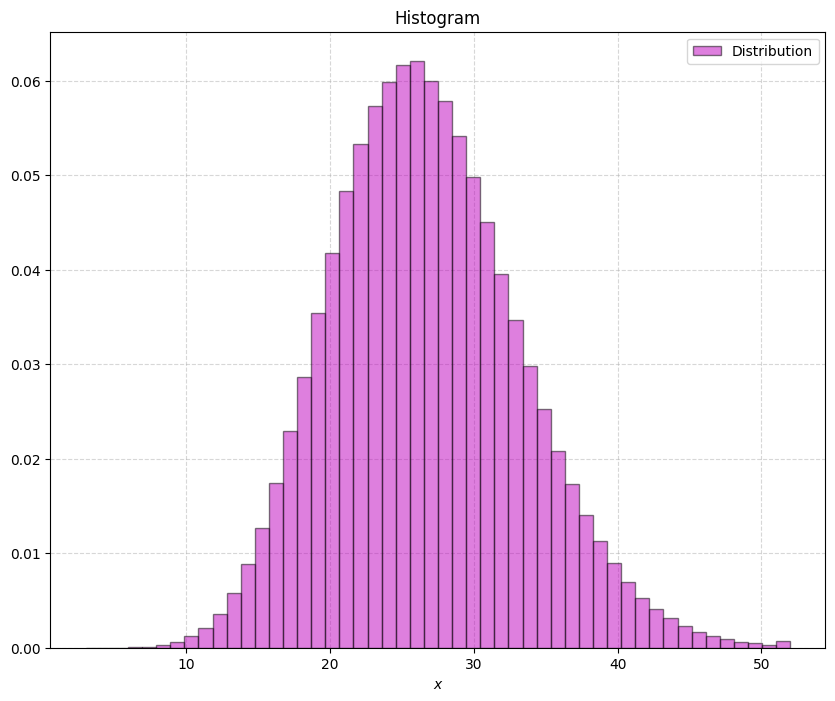

In [10]:
N = 10**6

list_with_points_2 = [generate_descreete_value() for i in range(N)]
create_histogram(list_with_points_2)


In [11]:
from scipy import stats


N = len(list_with_points_2)
mu = (np.array(list_with_points_2)).mean()
sigma = ((list_with_points_2 - mu) ** 2).sum() / (N - 1)

beta = 0.95
gamma = (1 + beta) / 2
t_gamma = stats.t.ppf(gamma, N-1)

low_mu = mu - sigma / np.sqrt(N) * t_gamma
upper_mu = mu + sigma / np.sqrt(N) * t_gamma

In [12]:
print("Точечная оценка матожидания: ", mu)
print("Точечная оценка дисперсии: ", sigma)

print(f"{beta}% интервальная оценка матожидания: [{low_mu}, {upper_mu}]")

Точечная оценка матожидания:  26.664423
Точечная оценка дисперсии:  44.32401740108837
0.95% интервальная оценка матожидания: [26.577549417094918, 26.75129658290508]


In [13]:
ecdf = stats.ecdf(list_with_points_2)

kolmogorov_stat = max(abs(ecdf.cdf.evaluate(x) - real_cdf(x))  for x in np.linspace(0, 1, N)) * np.sqrt(N)
print(kolmogorov_stat)
p_value = 1 - stats.kstwobign.cdf(kolmogorov_stat)

print("p_value: ", p_value)

2.4061490169918684e-05
p_value:  1.0
